<a href="https://colab.research.google.com/github/klysman08/Keggle/blob/master/Previs%C3%A3o_de_invent%C3%A1rio_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Módulos utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Leitura dos arquivos, preenchendo valores faltantes com -1
train = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/train.csv', index_col='sku').fillna(-1)
test = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/test.csv', index_col='sku').fillna(-1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Separação de atributos de entrada (X) e saída (y)
X_train, y_train = train.drop('isBackorder', axis=1), train['isBackorder']

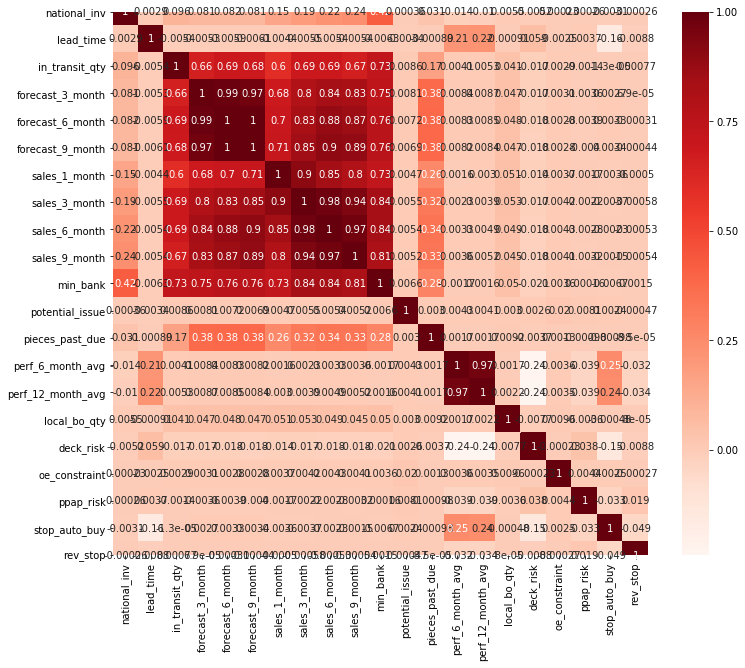

In [7]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
X_train.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [9]:
X_train.drop(['national_inv',
       'potential_issue', 'pieces_past_due', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'], axis=1)

,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,perf_6_month_avg,perf_12_month_avg
sku,,,,,,,,,,,,
1987420,2.0,0.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1.00,0.99
2171592,8.0,0.0,0.0,14.0,28.0,6.0,12.0,29.0,47.0,6.0,0.84,0.87
3135863,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.77,0.84
3108843,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.83,0.69
2978127,8.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,9.0,1.0,0.99,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...
1971041,-1.0,0.0,0.0,0.0,0.0,6.0,28.0,49.0,80.0,22.0,-99.00,-99.00
3331163,2.0,331.0,650.0,1690.0,2210.0,151.0,830.0,1689.0,2410.0,183.0,1.00,0.99
3403234,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,-99.00,-99.00


In [10]:
# Ajuste do modelo de Regressão Logística

model = MLPClassifier(hidden_layer_sizes=(50,30,20,20), activation='relu',alpha=0.01, learning_rate='adaptive', solver='adam', random_state=42, max_iter=2000, shuffle=True, verbose=True,)
model.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = 0.03155846
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = 0.02990926
Iteration 9, loss = 0.02955817
Iteration 10, loss = 0.02963138
Iteration 11, loss = 0.02935873
Iteration 12, loss = 0.02933747
Iteration 13, loss = 0.02918875
Iteration 14, loss = 0.02916396
Iteration 15, loss = 0.02902338
Iteration 16, loss = 0.02899838
Iteration 17, loss = 0.02896487
Iteration 18, loss = 0.02882184
Iteration 19, loss = 0.02883775
Iteration 20, loss = 0.02881108
Iteration 21, loss = 0.02883707
Iteration 22, loss = 0.02888381
Iteration 23, loss = 0.02887990
Iteration 24, loss = 0.02888269
Iteration 25, loss = 0.02887919
Iteration 26, loss = 0.02888199
Iteration 27, loss = 0.02873259
Iteration 28, loss = 0.02914513
Iteration 29, loss = 0.02879533
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30, 20, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
# Predição da probabilidade de falta (y) para novos valores
y_pred = model.predict_proba(test)[:,1]

In [0]:
# Cria e salva arquivo para submissão
test['isBackorder'] = y_pred
pred = test['isBackorder'].reset_index()
pred.to_csv('submissionML2-1.csv',index=False)